In [269]:
from scipy import stats
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from sklearn.model_selection import cross_val_score, validation_curve, learning_curve
from sklearn.model_selection import GridSearchCV

from sklearn.feature_selection import SelectKBest, chi2

import warnings
warnings.filterwarnings("ignore")

In [270]:
train = pd.read_csv('titanic//train.csv')

Titanic problem is a classification problem so we aim to determine weither the person survived or not based on some features

In [271]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


During this notebook we are going to pursue a data science methodology
* Data wrangling 
* Data analysis
* Descriptive statistic
* Feautres selection
* Features Transformation
* Model selection
* Improving hyperparameters

# Data Wrangling

In [272]:
print("train shape", train.shape)

train shape (891, 12)


In [273]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We are going to proceed like that : 
* for Embarked & Fare we are going to replace them with the mode.
* for Cabin we are going to delete it because of large amount of missing data.
* for Age we are going to delete the missing rows.

In [274]:
train['Embarked'] = train['Embarked'].fillna(str(train['Embarked'].mode()))

train = train.drop('Cabin', axis = 1)

train = train.dropna(subset = ['Age'])

# Data Analysis

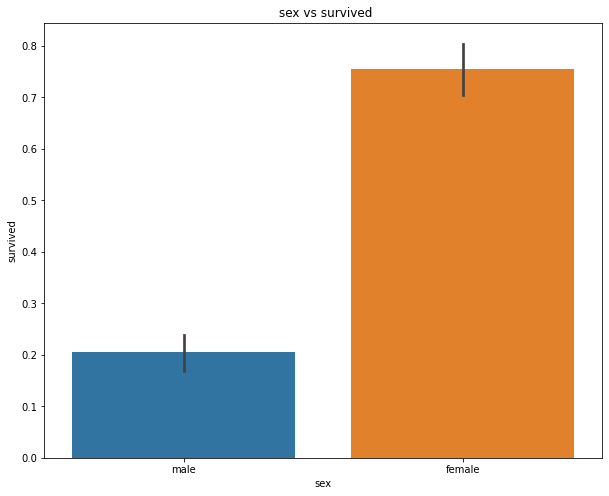

In [275]:
# we want to know how many people servived per sex
plt.figure(figsize = (10, 8))
sns.barplot(train.Sex, train.Survived)
plt.title(' sex vs survived')
plt.xlabel('sex')
plt.ylabel('survived')
plt.show()

Sadly most of man dead in titanic

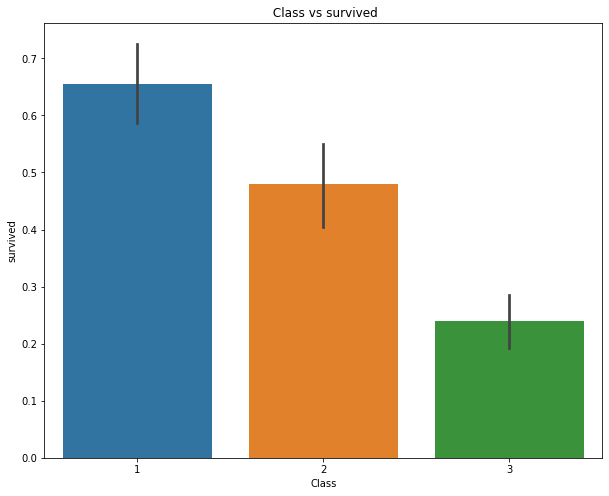

In [276]:
# we want to know how many people servived per class
plt.figure(figsize = (10, 8))
sns.barplot(train.Pclass, train.Survived)
plt.title(' Class vs survived')
plt.xlabel('Class')
plt.ylabel('survived')
plt.show()

Sadly people of 1er class who dead

In [277]:
bins=[0,5,12,18,30,60,np.inf]
labels=['Baby','Child','Teenager','Adult(young)','Middle age','Old age']
series = pd.cut(train["Age"], bins, labels = labels)

Text(0.5, 1.0, 'Age group vs Class')

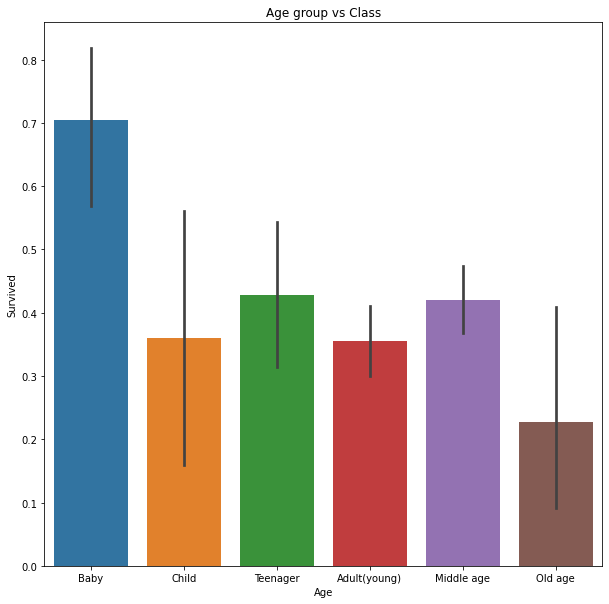

In [278]:
plt.figure(figsize=(10,10))
sns.barplot(series, train.Survived)
plt.title('Age group vs Class')

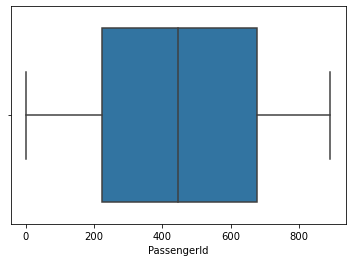

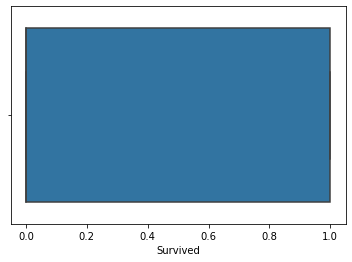

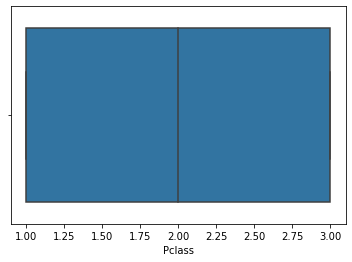

Name
Sex


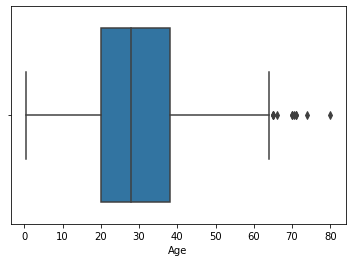

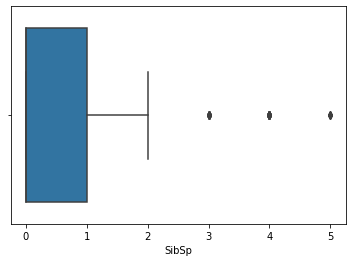

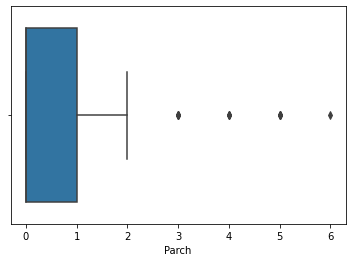

Ticket


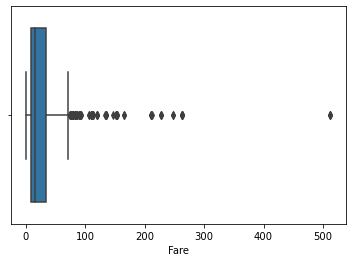

Embarked


In [279]:
for elm in train:
    try:
        sns.boxplot(x = train[elm])
    except:
        print(elm)
    plt.show()

In [280]:
train[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.754789
1,male,0.205298


In [281]:
train[["Pclass", "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.655914
1,2,0.479769
2,3,0.239437


# Descriptive Statistics

In [282]:
train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,714.000000,714.000000,714.000000,714.000000,714.000000,714.000000
mean,0.406162,2.236695,29.699118,0.512605,0.431373,34.694514
std,0.491460,0.838250,14.526497,0.929783,0.853289,52.918930
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,20.125000,0.000000,0.000000,8.050000
50%,0.000000,2.000000,28.000000,0.000000,0.000000,15.741700
75%,1.000000,3.000000,38.000000,1.000000,1.000000,33.375000
max,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


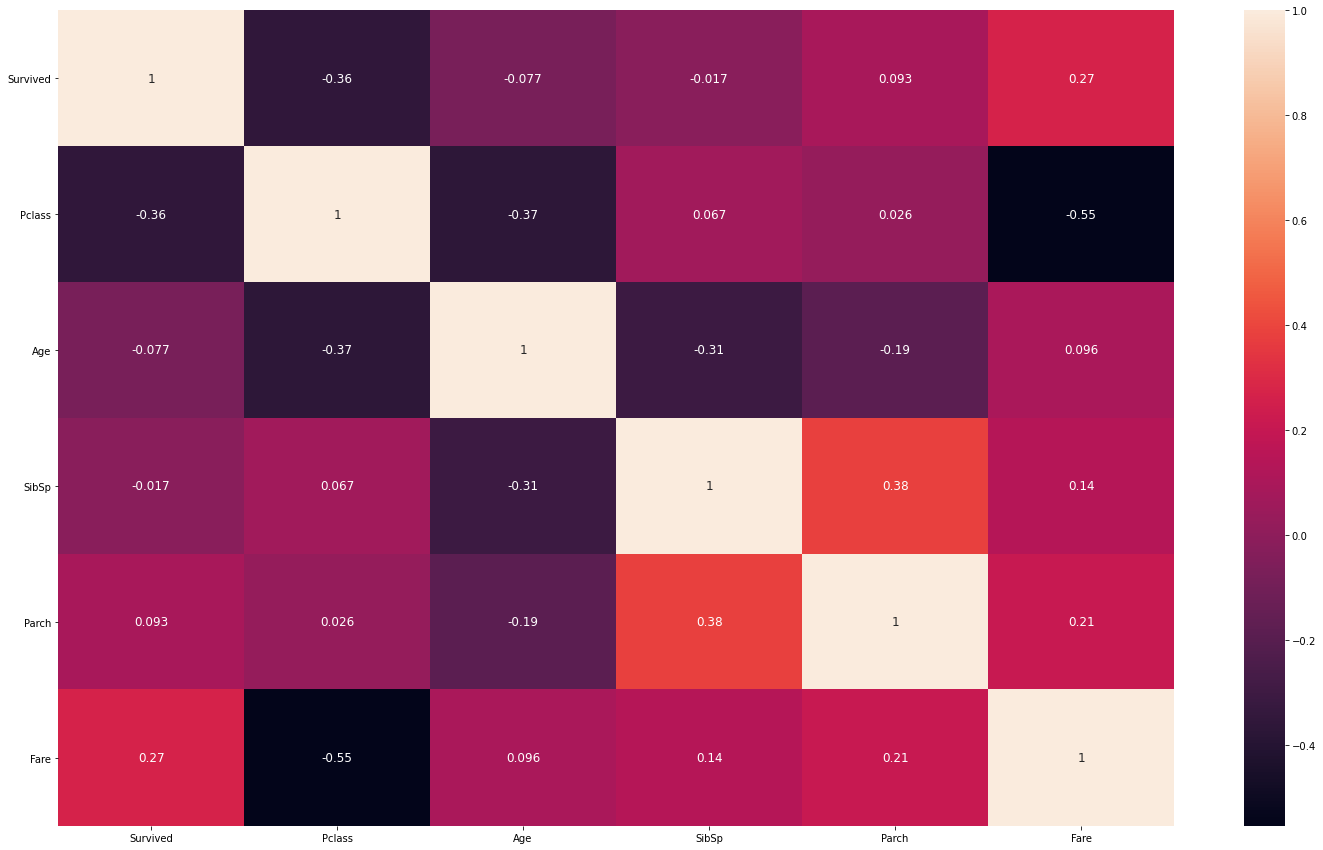

In [283]:
corr = train[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']].corr()
sns.heatmap(corr, xticklabels = corr.columns.values, yticklabels = corr.columns.values,annot = True, annot_kws = {'size':12})
heat_map = plt.gcf()
heat_map.set_size_inches(25,15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10)
plt.show()

# Features Transformation

In [284]:
train.set_index('PassengerId', inplace=True)

In [285]:
sex = LabelEncoder()
train.Sex = sex.fit_transform(train.Sex)

In [286]:
Embarked = LabelEncoder()
train.Embarked = Embarked.fit_transform(train.Embarked)

# Features Selection

In [288]:
train.var()

Survived       0.241533
Pclass         0.702663
Sex            0.232247
Age          211.019125
SibSp          0.864497
Parch          0.728103
Fare        2800.413100
Embarked       0.624041
dtype: float64

In [289]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch','Fare', 'Embarked']

In [290]:
#deux listes qui contient les scores et les p-values
chi2(train[features], train.Survived)

(array([2.89731967e+01, 7.57769181e+01, 3.02092336e+01, 3.62316147e-01,
        1.04797591e+01, 4.13934384e+03, 6.20451440e+00]),
 array([7.33867249e-08, 3.17591944e-18, 3.87858520e-08, 5.47222712e-01,
        1.20689491e-03, 0.00000000e+00, 1.27424902e-02]))

In [291]:
selector = SelectKBest(chi2, k = 5)
selector.fit(train[features], train.Survived)

SelectKBest(k=5, score_func=<function chi2 at 0x000002EFC16FB550>)

In [292]:
selector.get_support()

array([ True,  True,  True, False,  True,  True, False])

In [301]:
selected_features = ['Pclass', 'Sex', 'Age', 'Fare']

# Detection of outliers

In [302]:
"""
model = IsolationForest(contamination=0.02)
model.fit(train[selected_features])
outliers = model.predict(train[selected_features])
boolean_outliers = outliers == -1

train[selected_features] = train[selected_features].drop(train[selected_features][boolean_outliers].index)
"""

'\nmodel = IsolationForest(contamination=0.02)\nmodel.fit(train[selected_features])\noutliers = model.predict(train[selected_features])\nboolean_outliers = outliers == -1\n\ntrain[selected_features] = train[selected_features].drop(train[selected_features][boolean_outliers].index)\n'

# Splitting data

In [303]:
x_train, x_test, y_train, y_test = train_test_split(train[selected_features], train.Survived, test_size = 0.2, random_state = 42)

# Model selection

In this section we are going to present some classification algorithms that we are going to choose one of them for our prediction.

In [304]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), KNeighborsClassifier()]

In [307]:
for model in models:
    trainning_score = cross_val_score(model, x_train, y_train, cv = 4).mean()
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    
    print("{}".format(str(model)))
    print("Trainning score:{}".format(trainning_score))
    print("Testing score:{}".format(accuracy_score(y_test, pred)))
    print("_"*120)
    pass
pass

LogisticRegression()
Trainning score:0.8126046488722546
Testing score:0.7552447552447552
________________________________________________________________________________________________________________________
DecisionTreeClassifier()
Trainning score:0.7582980399881808
Testing score:0.7062937062937062
________________________________________________________________________________________________________________________
RandomForestClassifier()
Trainning score:0.8248547227420466
Testing score:0.7762237762237763
________________________________________________________________________________________________________________________
SVC()
Trainning score:0.6847114153452181
Testing score:0.6153846153846154
________________________________________________________________________________________________________________________
KNeighborsClassifier()
Trainning score:0.7215231951147445
Testing score:0.6573426573426573
____________________________________________________________________________

we conclude that Random Forest is the best algorithm in both trainingset and testingset and logistic regression is the best in testingset.

# Improving hyperparameters

let's improve these models and see if it will be much better than random forest or logstic regression

### Improving random forest hyperparameters

In [309]:
n_estimators = np.arange(0,8)
max_depth = np.arange(0,8)
leafs     = np.arange(0,8)
quality_split = ['entropy', 'gini']
grid_param = [{'n_estimators': n_estimators, 'criterion': quality_split , 'max_depth': max_depth, 'min_samples_leaf': leafs}]

In [310]:
grid_rendom_forst = GridSearchCV(RandomForestClassifier(), grid_param, cv = 4)

In [311]:
grid_rendom_forst.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': array([0, 1, 2, 3, 4, 5, 6, 7]),
                          'min_samples_leaf': array([0, 1, 2, 3, 4, 5, 6, 7]),
                          'n_estimators': array([0, 1, 2, 3, 4, 5, 6, 7])}])

In [312]:
grid_rendom_forst.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 3,
 'n_estimators': 5}

In [313]:
print("Trainning score:{}".format(grid_rendom_forst.score(x_train, y_train)))
print("Testing score:{}".format(grid_rendom_forst.score(x_test, y_test)))

Trainning score:0.8791593695271454
Testing score:0.7902097902097902


### improving decession tree hyperparameters

In [314]:
max_depth = np.arange(0,12)
leafs     = np.arange(0,12)
quality_split = ['entropy', 'gini']
grid_param = [{'criterion': quality_split , 'max_depth': max_depth, 'min_samples_leaf': leafs}]

In [315]:
grid_decisiontree = GridSearchCV(DecisionTreeClassifier(), grid_param, cv = 5)
grid_decisiontree.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
                          'min_samples_leaf': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])}])

In [316]:
grid_decisiontree.best_params_

{'criterion': 'gini', 'max_depth': 6, 'min_samples_leaf': 11}

In [317]:
print("Trainning score:{}".format(grid_decisiontree.score(x_train, y_train)))
print("Testing score:{}".format(grid_decisiontree.score(x_test, y_test)))

Trainning score:0.8476357267950964
Testing score:0.7622377622377622


### improving SVM

In [318]:
model = SVC(kernel = 'linear', C = 100)
trainning_score = cross_val_score(model, x_train, y_train, cv = 5).mean()
model.fit(x_train, y_train)
pred = model.predict(x_test)

In [319]:
print("Trainning score:{}".format(trainning_score))
print("Testing score:{}".format(accuracy_score(y_test, pred)))

Trainning score:0.7916247139588101
Testing score:0.7412587412587412


# Deleteting ourliers using Isolation Forest unsupervised learning

In [320]:
sf = ['Pclass', 'Sex', 'Age','Fare', 'Survived']
cleaned_data = train[sf].dropna()

In [321]:
model = IsolationForest(contamination=0.02)
model.fit(cleaned_data.drop('Survived', axis = 1))
outliers = model.predict(cleaned_data.drop('Survived', axis = 1))
boolean_outliers = outliers == -1

cleaned_data = cleaned_data.drop(cleaned_data[boolean_outliers].index)

In [322]:
x_train, x_test, y_train, y_test = train_test_split(cleaned_data.drop('Survived', axis = 1), cleaned_data.Survived, test_size = 0.2, random_state = 42)

In [323]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), SVC(), KNeighborsClassifier()]

In [324]:
for model in models:
    trainning_score = cross_val_score(model, x_train, y_train, cv = 5).mean()
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    
    print("{}".format(str(model)))
    print("Trainning score:{}".format(trainning_score))
    print("Testing score:{}".format(accuracy_score(y_test, pred)))
    print("_"*120)
    pass
pass

LogisticRegression()
Trainning score:0.8049871299871301
Testing score:0.8071428571428572
________________________________________________________________________________________________________________________
DecisionTreeClassifier()
Trainning score:0.7674227799227799
Testing score:0.7714285714285715
________________________________________________________________________________________________________________________
RandomForestClassifier()
Trainning score:0.7888674388674388
Testing score:0.7785714285714286
________________________________________________________________________________________________________________________
SVC()
Trainning score:0.6725707850707852
Testing score:0.6642857142857143
________________________________________________________________________________________________________________________
KNeighborsClassifier()
Trainning score:0.6636743886743887
Testing score:0.7
___________________________________________________________________________________________

In [260]:
n_estimators = np.arange(0,10)
max_depth = np.arange(0,10)
leafs     = np.arange(0,10)
quality_split = ['entropy', 'gini']
grid_param = [{'n_estimators': n_estimators, 'criterion': quality_split , 'max_depth': max_depth, 'min_samples_leaf': leafs}]

grid_rendom_forst = GridSearchCV(RandomForestClassifier(), grid_param, cv = 5)

In [261]:
grid_rendom_forst.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['entropy', 'gini'],
                          'max_depth': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                          'min_samples_leaf': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                          'n_estimators': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])}])

In [262]:
grid_rendom_forst.best_params_

{'criterion': 'entropy',
 'max_depth': 7,
 'min_samples_leaf': 4,
 'n_estimators': 8}

In [263]:
print("Trainning score:{}".format(grid_rendom_forst.score(x_train, y_train)))
print("Testing score:{}".format(grid_rendom_forst.score(x_test, y_test)))

Trainning score:0.8795620437956204
Testing score:0.781021897810219


In [205]:
print("the end")

the end
